In [1]:
## Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
#reading the data
host = pd.read_csv(r"C:\Users\suchi\Downloads\AirBnb_ABADS-20240316T083308Z-001\AirBnb_ABADS\hosts.csv")

In [3]:
#reading the data
calendar = pd.read_csv(r"C:\Users\suchi\Downloads\AirBnb_ABADS-20240316T083308Z-001\AirBnb_ABADS\calendar.csv")

In [4]:
#reading the data
listings = pd.read_csv(r"C:\Users\suchi\Downloads\AirBnb_ABADS-20240316T083308Z-001\AirBnb_ABADS\listings.csv")

In [5]:
#reading the data
review = pd.read_csv(r"C:\Users\suchi\Downloads\AirBnb_ABADS-20240316T083308Z-001\AirBnb_ABADS\reviews.csv")

### Look at the table Calendar how many rows and unique listing ids are present? Are there any implications when it comes to having more rows and less unique listing ids?

In [6]:
num_rows = len(calendar)
unique_listing_ids = calendar['listing_id'].nunique()
print("Number of rows in the Calendar table:", num_rows)
print("Number of unique listing IDs:", unique_listing_ids)

Number of rows in the Calendar table: 319192
Number of unique listing IDs: 1749


- Yes, there are implications.Having more rows and fewer unique identifiers in a table brings challenges related to data redundancy, integrity, analysis complexity, performance, resource utilization, and data maintenance.

### Look at the price column in Calendar table. What transformations you will need to perform.so that you can create a column that can be used as a target/response variable?

In [7]:
calendar.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


In [8]:
# Drop the 'adjusted_price' column from the Calendar table in place
calendar.drop('adjusted_price', axis=1, inplace=True)

In [9]:
calendar.head()

,calender_id,listing_id,date,available,price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,2,1125


In [10]:
calendar['date']=calendar['date'].str[0:10]

In [11]:
calendar.head()

,calender_id,listing_id,date,available,price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03,0,56.0,3,5
1,2,22742449,2022-11-13,1,95.0,2,99
2,3,34621717,2022-04-17,0,75.0,2,1125
3,4,38281744,2022-01-31,1,150.0,1,1000
4,5,18835003,2022-05-21,0,100.0,2,1125


In [12]:
# Convert the 'date' column to datetime format
calendar['date'] = pd.to_datetime(calendar['date'])

In [13]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   calender_id     319192 non-null  int64         
 1   listing_id      319192 non-null  int64         
 2   date            319192 non-null  datetime64[ns]
 3   available       319192 non-null  int64         
 4   price           319117 non-null  float64       
 5   minimum_nights  319192 non-null  int64         
 6   maximum_nights  319192 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 17.0 MB


In [14]:
calendar.isnull().sum()

calender_id        0
listing_id         0
date               0
available          0
price             75
minimum_nights     0
maximum_nights     0
dtype: int64

In [15]:
# Drop rows with missing values
calendar.dropna(inplace=True)

In [16]:
calendar.isnull().sum()

calender_id       0
listing_id        0
date              0
available         0
price             0
minimum_nights    0
maximum_nights    0
dtype: int64

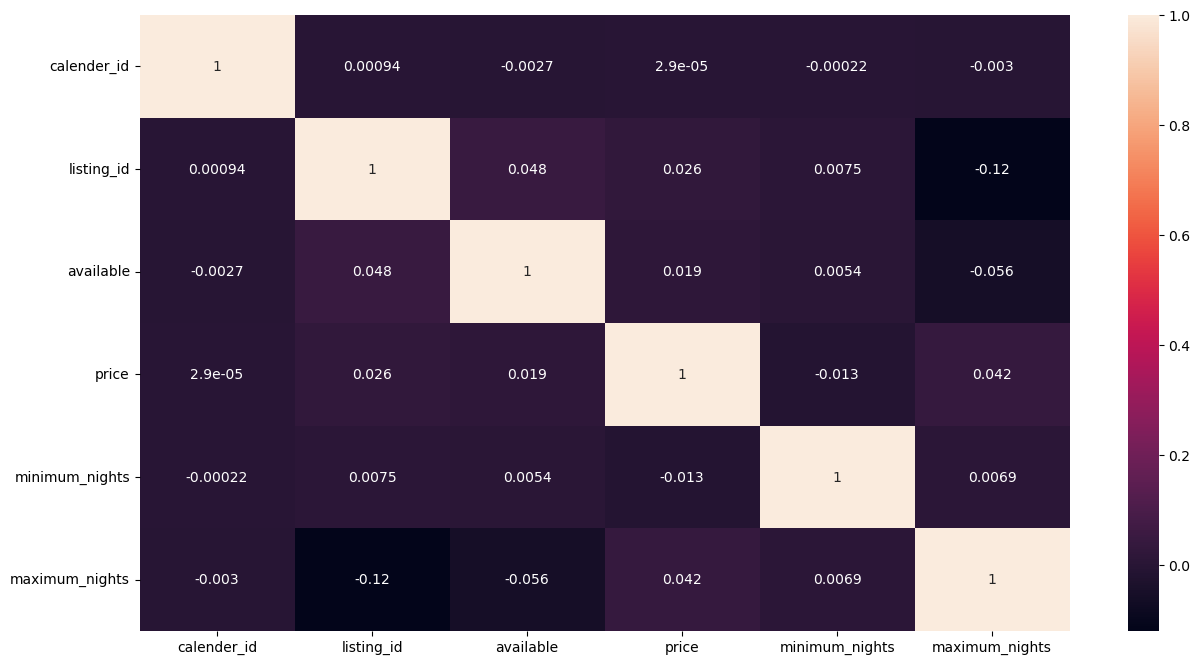

In [70]:
# Create the heatmap of the correlation matrix with annotations
plt.figure(figsize=(15,8))
sns.heatmap(calendar.corr(),annot=True)
plt.show()

### Look at the tables Listings, Hosts and Reviews to come up with a list of potential transformations needed in order to have predictors that can be used to predict the listing price.

In [18]:
host.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [19]:
review.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [20]:
listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [21]:
calendar.head()

,calender_id,listing_id,date,available,price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03,0,56.0,3,5
1,2,22742449,2022-11-13,1,95.0,2,99
2,3,34621717,2022-04-17,0,75.0,2,1125
3,4,38281744,2022-01-31,1,150.0,1,1000
4,5,18835003,2022-05-21,0,100.0,2,1125


In [22]:
host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


In [23]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


In [24]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62923 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


In [25]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319117 entries, 0 to 319191
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   calender_id     319117 non-null  int64         
 1   listing_id      319117 non-null  int64         
 2   date            319117 non-null  datetime64[ns]
 3   available       319117 non-null  int64         
 4   price           319117 non-null  float64       
 5   minimum_nights  319117 non-null  int64         
 6   maximum_nights  319117 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 19.5 MB


In [26]:
#rows and columns 
host.shape

(1111, 5)

In [27]:
#rows and columns 
review.shape

(62987, 6)

In [28]:
#rows and columns 
calendar.shape

(319117, 7)

In [29]:
#rows and columns 
listings.shape

(1749, 14)

### Create an aggregated view of data spread across different tables, containing the target as well as predictor variables.

In [30]:
# Merge All Data set ######
merge = pd.concat([host,calendar,listings,review],axis=1,join='inner')

In [31]:
merge.isna().sum()

host_id             0
host_name           0
host_since          0
host_location       3
host_about        621
calender_id         0
listing_id          0
date                0
available           0
price               0
minimum_nights      0
maximum_nights      0
listing_id          0
listing_url         0
name                0
description        26
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms           89
beds                8
amenities           0
host_id             0
review_id           0
listing_id          0
date                0
reviewer_id         0
reviewer_name       0
comments            1
dtype: int64

In [32]:
merge.head()

,host_id,host_name,host_since,host_location,host_about,calender_id,listing_id,date,available,price,...,bedrooms,beds,amenities,host_id,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,1,40334325,2022-08-03,0,56.0,...,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo...",2,22742449,2022-11-13,1,95.0,...,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN,3,34621717,2022-04-17,0,75.0,...,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...,4,38281744,2022-01-31,1,150.0,...,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...,5,18835003,2022-05-21,0,100.0,...,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [33]:
median_value = merge["bedrooms"].median()

In [34]:
merge["bedrooms"].fillna(median_value, inplace=True)

In [35]:
median_bed = merge["beds"].median()

In [36]:
merge["beds"].fillna(median_bed,inplace= True)

In [37]:
merge['host_location'].fillna('unknown',inplace=True)

In [38]:
merge.isnull().sum()

host_id             0
host_name           0
host_since          0
host_location       0
host_about        621
calender_id         0
listing_id          0
date                0
available           0
price               0
minimum_nights      0
maximum_nights      0
listing_id          0
listing_url         0
name                0
description        26
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms            0
beds                0
amenities           0
host_id             0
review_id           0
listing_id          0
date                0
reviewer_id         0
reviewer_name       0
comments            1
dtype: int64

In [39]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   host_id         1111 non-null   int64         
 1   host_name       1111 non-null   object        
 2   host_since      1111 non-null   object        
 3   host_location   1111 non-null   object        
 4   host_about      490 non-null    object        
 5   calender_id     1111 non-null   int64         
 6   listing_id      1111 non-null   int64         
 7   date            1111 non-null   datetime64[ns]
 8   available       1111 non-null   int64         
 9   price           1111 non-null   float64       
 10  minimum_nights  1111 non-null   int64         
 11  maximum_nights  1111 non-null   int64         
 12  listing_id      1111 non-null   int64         
 13  listing_url     1111 non-null   object        
 14  name            1111 non-null   object        
 15  desc

In [40]:
merge.head()

,host_id,host_name,host_since,host_location,host_about,calender_id,listing_id,date,available,price,...,bedrooms,beds,amenities,host_id,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,1,40334325,2022-08-03,0,56.0,...,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo...",2,22742449,2022-11-13,1,95.0,...,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN,3,34621717,2022-04-17,0,75.0,...,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...,4,38281744,2022-01-31,1,150.0,...,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...,5,18835003,2022-05-21,0,100.0,...,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [41]:
#rows and columns 
merge.shape

(1111, 32)

C:\Users\suchi\AppData\Local\Temp\ipykernel_26588\1741514679.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merge.corr(),annot=True)


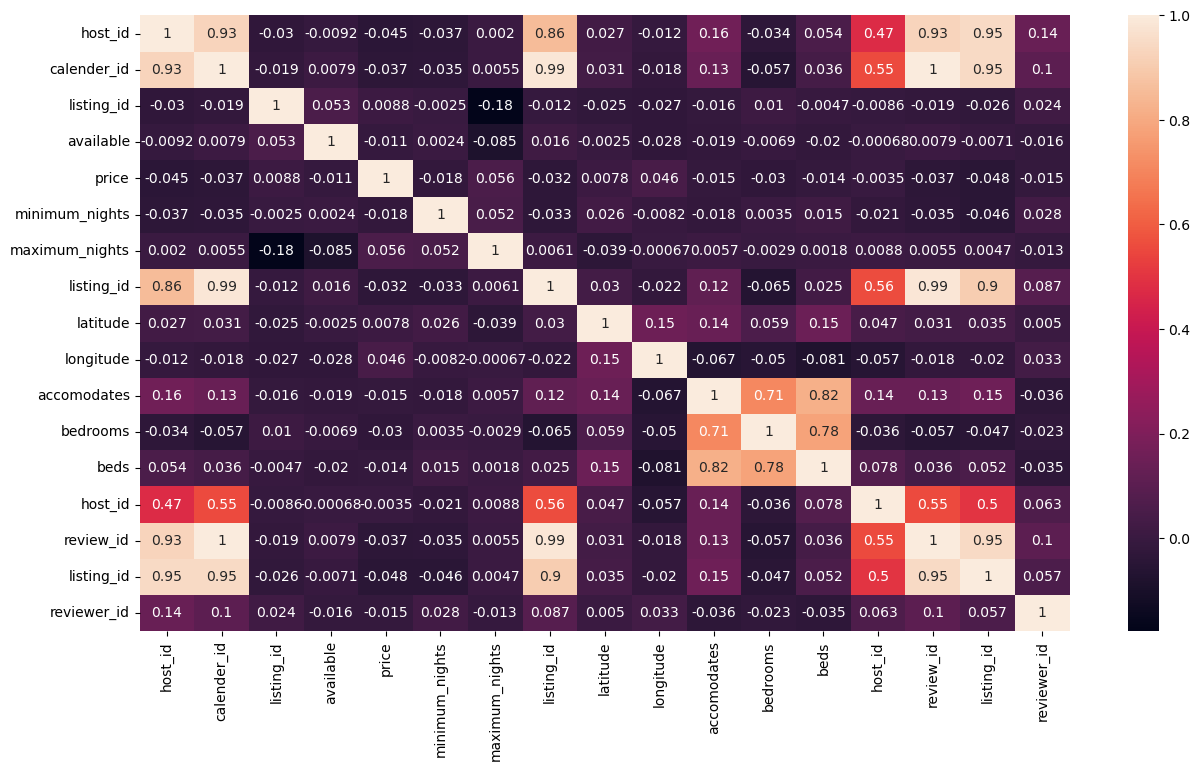

In [42]:
# Create the heatmap of the correlation matrix with annotations
plt.figure(figsize=(15,8))
sns.heatmap(merge.corr(),annot=True)
plt.show()

In [43]:
# Drop duplicate columns
df = merge.loc[:, ~merge.columns.duplicated()]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   host_id         1111 non-null   int64         
 1   host_name       1111 non-null   object        
 2   host_since      1111 non-null   object        
 3   host_location   1111 non-null   object        
 4   host_about      490 non-null    object        
 5   calender_id     1111 non-null   int64         
 6   listing_id      1111 non-null   int64         
 7   date            1111 non-null   datetime64[ns]
 8   available       1111 non-null   int64         
 9   price           1111 non-null   float64       
 10  minimum_nights  1111 non-null   int64         
 11  maximum_nights  1111 non-null   int64         
 12  listing_url     1111 non-null   object        
 13  name            1111 non-null   object        
 14  description     1085 non-null   object        
 15  lati

In [44]:
# Drop multiple columns 
columns_to_drop = ['host_id','host_name','host_since','calender_id','listing_id','review_id','reviewer_id','reviewer_name','listing_url','name','latitude','longitude','host_about','description','comments']
df.drop(columns_to_drop, axis=1, inplace=True)

C:\Users\suchi\AppData\Local\Temp\ipykernel_26588\1814620140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns_to_drop, axis=1, inplace=True)


In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   host_location   1111 non-null   object        
 1   date            1111 non-null   datetime64[ns]
 2   available       1111 non-null   int64         
 3   price           1111 non-null   float64       
 4   minimum_nights  1111 non-null   int64         
 5   maximum_nights  1111 non-null   int64         
 6   property_type   1111 non-null   object        
 7   room_type       1111 non-null   object        
 8   accomodates     1111 non-null   int64         
 9   bathrooms_text  1111 non-null   object        
 10  bedrooms        1111 non-null   float64       
 11  beds            1111 non-null   float64       
 12  amenities       1111 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 113.0+ KB
None


In [46]:
df.head()

,host_location,date,available,price,minimum_nights,maximum_nights,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities
0,"Antwerp, Flanders, Belgium",2022-08-03,0,56.0,3,5,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp..."
1,"Antwerp, Flemish Region, Belgium",2022-11-13,1,95.0,2,99,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park..."
2,"Antwerp, Flanders, Belgium",2022-04-17,0,75.0,2,1125,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""..."
3,"Antwerp, Flanders, Belgium",2022-01-31,1,150.0,1,1000,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s..."
4,"Edegem, Flanders, Belgium",2022-05-21,0,100.0,2,1125,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh..."


In [47]:
#rows and columns
df.shape

(1111, 13)

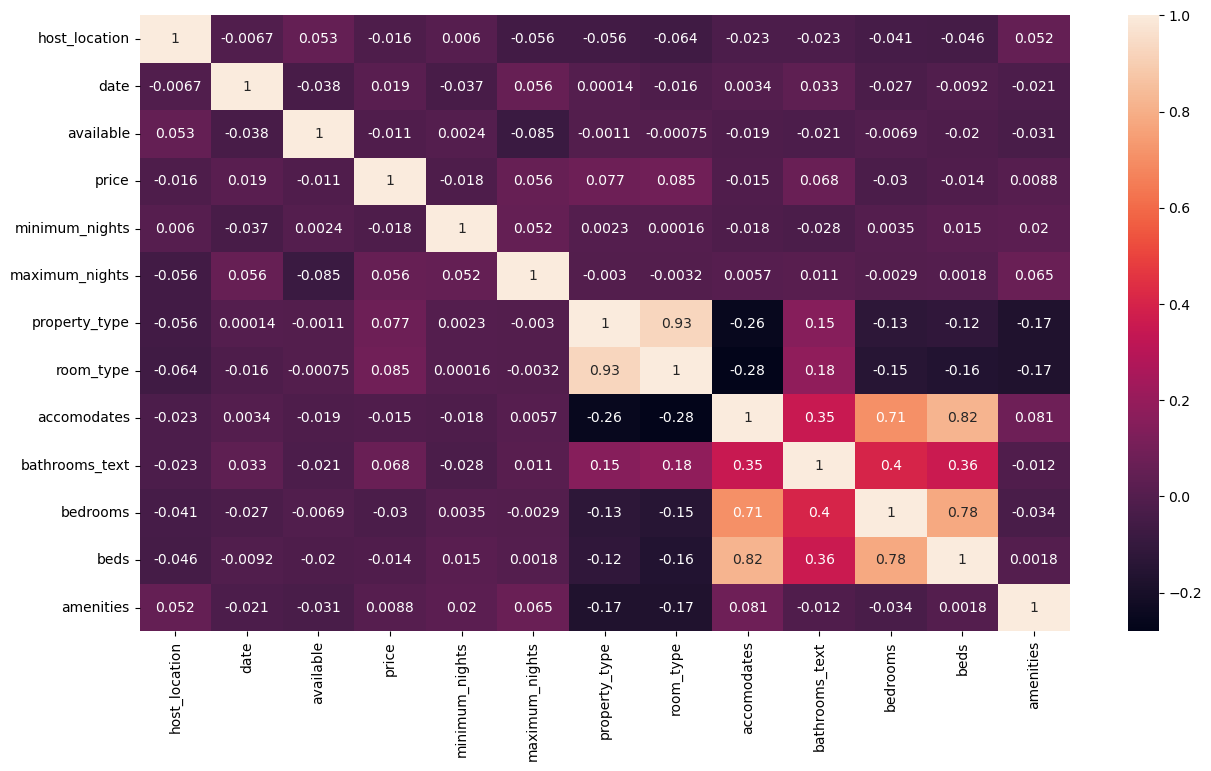

In [65]:
# Create the heatmap of the correlation matrix with annotations
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: >

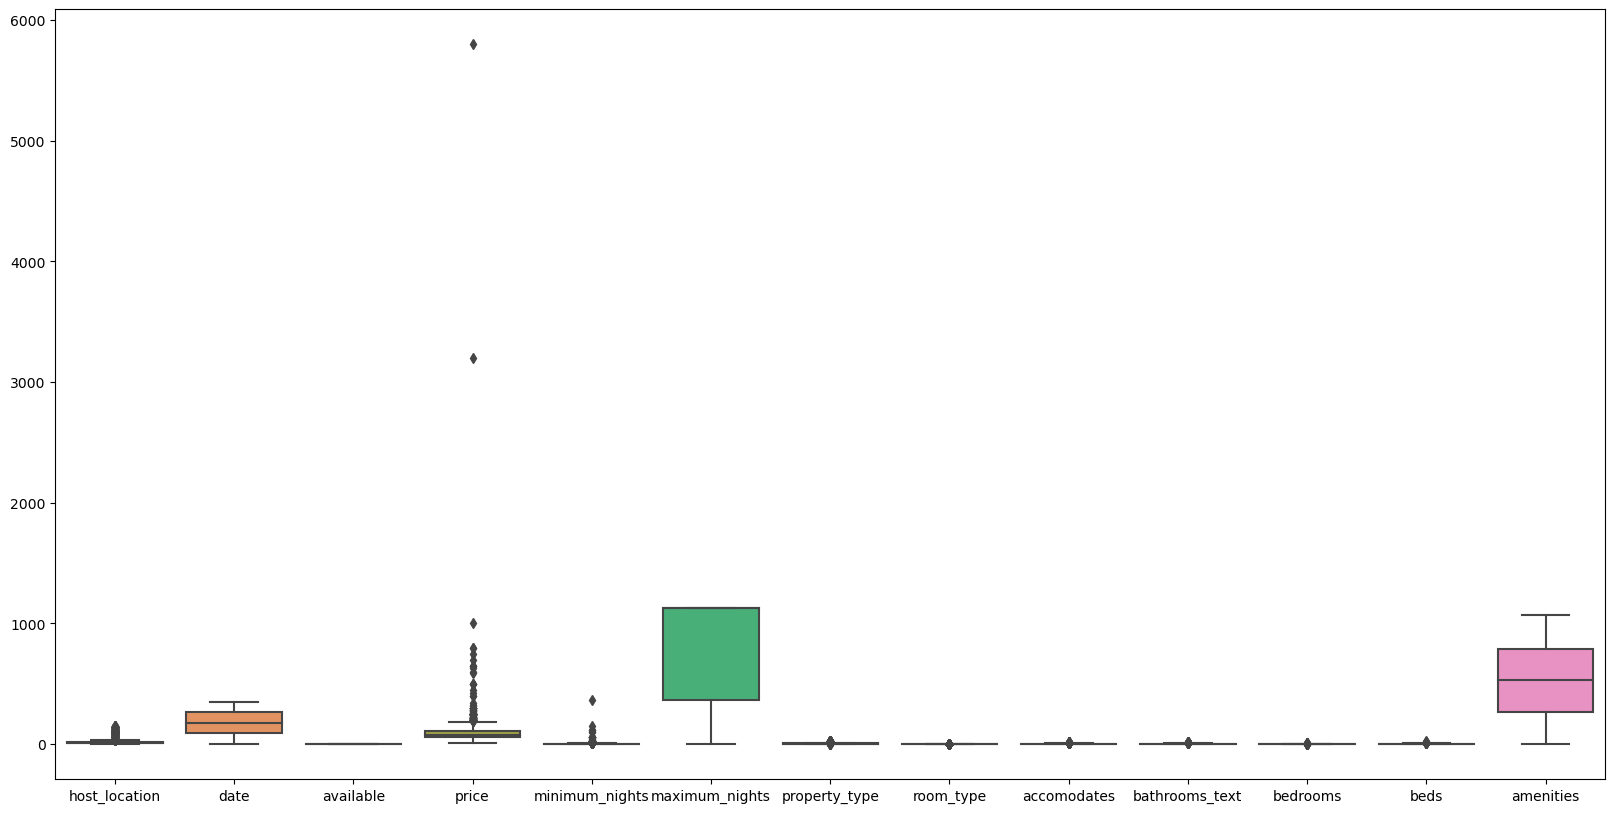

In [69]:
# Create the boxplot using Seaborn
plt.figure(figsize=(20,10))
sns.boxplot(df)

In [50]:
df.describe()

,available,price,minimum_nights,maximum_nights,accomodates,bedrooms,beds
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.533753,108.931593,5.213321,793.014401,3.627363,1.485149,2.188119
std,0.499084,213.143007,15.424166,475.821459,2.539371,0.965861,1.951595
min,0.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,59.000000,1.000000,365.000000,2.000000,1.000000,1.000000
50%,1.000000,79.000000,2.000000,1125.000000,3.000000,1.000000,2.000000
75%,1.000000,110.500000,3.000000,1125.000000,4.000000,2.000000,3.000000
max,1.000000,5800.000000,365.000000,1125.000000,16.000000,11.000000,25.000000


In [51]:
# Calculate the first quartile (Q1)
Q1 = df['minimum_nights'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['minimum_nights'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['minimum_nights'] < lower_bound) | (df['minimum_nights'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers detected using IQR method:", num_outliers)

Number of outliers detected using IQR method: 163


In [52]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
df['property_type'] = pd.Series(le.fit_transform(df['property_type']))
df['room_type'] = pd.Series(le.fit_transform(df['room_type']))
df['bathrooms_text'] = pd.Series(le.fit_transform(df['bathrooms_text']))
df['amenities'] = pd.Series(le.fit_transform(df['amenities']))
df['host_location'] = pd.Series(le.fit_transform(df['host_location']))
df['date'] = pd.Series(le.fit_transform(df['date']))

C:\Users\suchi\AppData\Local\Temp\ipykernel_26588\256673560.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['property_type'] = pd.Series(le.fit_transform(df['property_type']))
C:\Users\suchi\AppData\Local\Temp\ipykernel_26588\256673560.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room_type'] = pd.Series(le.fit_transform(df['room_type']))
C:\Users\suchi\AppData\Local\Temp\ipykernel_26588\256673560.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [53]:
df.head()

,host_location,date,available,price,minimum_nights,maximum_nights,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities
0,7,210,0,56.0,3,5,23,1,2,3,1.0,1.0,276
1,8,310,1,95.0,2,99,5,0,4,9,2.0,2.0,610
2,7,106,0,75.0,2,1125,0,0,5,2,1.0,3.0,328
3,7,34,1,150.0,1,1000,19,2,2,8,1.0,1.0,62
4,42,139,0,100.0,2,1125,5,0,3,2,1.0,2.0,736


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   host_location   1111 non-null   int32  
 1   date            1111 non-null   int64  
 2   available       1111 non-null   int64  
 3   price           1111 non-null   float64
 4   minimum_nights  1111 non-null   int64  
 5   maximum_nights  1111 non-null   int64  
 6   property_type   1111 non-null   int32  
 7   room_type       1111 non-null   int32  
 8   accomodates     1111 non-null   int64  
 9   bathrooms_text  1111 non-null   int32  
 10  bedrooms        1111 non-null   float64
 11  beds            1111 non-null   float64
 12  amenities       1111 non-null   int32  
dtypes: float64(3), int32(5), int64(5)
memory usage: 91.3 KB


In [55]:
# Convert columns to integer type
df['beds']=df['beds'].astype(int)
df['bedrooms']=df['bedrooms'].astype(int)
df['price']=df['price'].astype(int)

C:\Users\suchi\AppData\Local\Temp\ipykernel_26588\4014495097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['beds']=df['beds'].astype(int)
C:\Users\suchi\AppData\Local\Temp\ipykernel_26588\4014495097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedrooms']=df['bedrooms'].astype(int)
C:\Users\suchi\AppData\Local\Temp\ipykernel_26588\4014495097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [56]:
df.head()

,host_location,date,available,price,minimum_nights,maximum_nights,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities
0,7,210,0,56,3,5,23,1,2,3,1,1,276
1,8,310,1,95,2,99,5,0,4,9,2,2,610
2,7,106,0,75,2,1125,0,0,5,2,1,3,328
3,7,34,1,150,1,1000,19,2,2,8,1,1,62
4,42,139,0,100,2,1125,5,0,3,2,1,2,736


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   host_location   1111 non-null   int32
 1   date            1111 non-null   int64
 2   available       1111 non-null   int64
 3   price           1111 non-null   int32
 4   minimum_nights  1111 non-null   int64
 5   maximum_nights  1111 non-null   int64
 6   property_type   1111 non-null   int32
 7   room_type       1111 non-null   int32
 8   accomodates     1111 non-null   int64
 9   bathrooms_text  1111 non-null   int32
 10  bedrooms        1111 non-null   int32
 11  beds            1111 non-null   int32
 12  amenities       1111 non-null   int32
dtypes: int32(8), int64(5)
memory usage: 78.2 KB


In [58]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [59]:
df.columns

Index(['host_location', 'date', 'available', 'price', 'minimum_nights',
       'maximum_nights', 'property_type', 'room_type', 'accomodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities'],
      dtype='object')

In [60]:
x=['host_location', 'date', 'available', 'minimum_nights',
       'maximum_nights', 'property_type', 'room_type', 'accomodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities']

In [61]:
from sklearn.model_selection import train_test_split
# Assuming you have a DataFrame df with features and a target column 'target_column'
X = df.drop('price',axis=1)
y = df['price']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)##This specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.

In [62]:
from lazypredict.Supervised import LazyRegressor
# Assuming 'X' contains your features and 'y' is your target variable
X = df.drop('price', axis=1)  # Drop the target column from features
y = df['price']  # Extract the target column

In [63]:
# Initialize LazyRegressor
regressor = LazyRegressor(predictions=True, random_state=42)
# Fit LazyRegressor to your training data
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:15<00:00,  2.68it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 888, number of used features: 12
[LightGBM] [Info] Start training from score 110.180180


In [64]:
# Display the performance metrics of evaluated models
print(models)

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
DummyRegressor                              -0.06      -0.01  86.31   
GammaRegressor                              -0.08      -0.02  87.07   
ElasticNetCV                                -0.09      -0.03  87.21   
BayesianRidge                               -0.09      -0.03  87.27   
LassoLarsCV                                 -0.09      -0.03  87.30   
LarsCV                                      -0.09      -0.03  87.30   
LassoCV                                     -0.09      -0.03  87.31   
TweedieRegressor                            -0.10      -0.04  87.86   
LassoLarsIC                                 -0.11      -0.05  88.27   
OrthogonalMatchingPursuit                   -0.12      -0.06  88.57   
NuSVR                                       -0.12      -0.06  88.60   
ElasticNet                                  -0.12      -0.06  88.71   
HuberR